# ALGORITMOS DE ORDENAÇÃO QUADRÁTICOS

### PROPOSTA:
- Utilizou-se os algoritmos quadráticos **`insertion sort`, `selection sort`, `bubble sort` e `shell sort` aplicados em um `dataset`** (arquivo "data.csv") do jogo FIFA 19.
- O arquivo **`csv`** proposto possui o registro de **18208 jogadores descritos por 89 atributos**. Para o dado problema, utilizou-se todos os registros dos jogadores filtrando os campos de interesse — ID (não sequencial), nome, foto do jogador, nacionalidade, nome do clube e logo do clube.
- O objetivo do atual `notebook` é utilizar os algoritmos de ordenação para **separar os jogadores por clubes (literais)** e, ao final, **gerar um jogador aleatório e apresentar todo o elenco do clube ao qual pertence o atleta**.
- É representado também a **comparação gráfica (histograma) dos algoritmos de ordenação** com a lista totalmente desordenada, assim como também é apresentado o desempenho dos mesmos algoritmos caso estejam passando em uma lista já ordenada.
- Ao final, é **apresentada a logo do clube e todos os jogadores que compõem o elenco com suas respectivas fotos e descrições**.

### Alunos:
- Lieverton Silva,
- Welison Regis

# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import urllib
import time
import random

from matplotlib import pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# SOCCER PLAYER CLASS

In [2]:
class Player:
    """Model to represent a soccer player

    Attributes:
        ID: ID of soccer player according to FIFA 19;
        name: soccer player name;
        photo: url with soccer photo;
        nationality: player nationality;
        club: club name;
        club_logo: url with club logo photo.
    """
    
    def __init__(self, ID, name, photo, nationality, flag, club, club_logo):
        self.ID = int(ID)
        self.name = name
        self.photo = photo
        self.nationality = nationality
        self.flag = flag
        self.club = club
        self.club_logo = club_logo

# READ PLAYERS FROM CSV

In [3]:
def read_csv(filename = './assets/data.csv'): 
    """Method to read specific soccer informations from csv file
    
    attributes:
        filename: path to csv file with soccer informations.
    """
    
    df = pd.read_csv(filename, usecols=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo'])
    
    players = []
    for index, row in df.iterrows():
        ID = int(row['ID'])
        name = row['Name']
        photo = row['Photo']
        nationality = row['Nationality']
        flag = row['Flag']
        club = str(row['Club']).strip()
        club_logo = row['Club Logo']
        
        player = Player(ID, name, photo, nationality, flag, club, club_logo)
        players.append(player)
    
    return players

In [4]:
players_global = read_csv()

# SOCCER PLAYER INFORMATIONS

In [5]:
def plot_photo(direct_url):
    """Show soccer player image or club logo based on url
    
    Attributes:
        direct_url: url path to soccer player image or club logo.
    
    OBS: INTERNET CONNECTION IS REQUIRED TO PLOT IMAGES!
    """
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    # take photo url and increase size with replace
    direct_url = direct_url.replace(r'/2/', r'/6/')
    direct_url = direct_url.replace(r'/4/', r'/6/')
    
    try:
        request = urllib.request.Request(direct_url, headers={'User-Agent': user_agent})
        response = urllib.request.urlopen(request)
    
        # read the image file in a numpy array
        image = plt.imread(response, format='PNG')
        image = image.copy()

        plt.imshow(image)
        plt.show()
    
    except Exception as e:
        print('\nFoto indisponível nos servidores FIFA!\n')

In [6]:
def show_player_informations(player):
    """Show player informations, including photo
    
    Attributes:
        player: soccer player object.
    
    OBS: INTERNET CONNECTION IS REQUIRED TO PLOT IMAGES!
    """
    
    plot_photo(player.photo)
    
    print('Nome: ', player.name)
    print('ID: ', player.ID)
    print('Nacionalidade: ', player.nationality)
    print('Clube: ', player.club)

In [7]:
def show_players_example(players, n = 3):
    """Show first nth players
    
    Attributes:
        players: players: list with all soccer players;
        n: number of players to show.
    
    OBS: INTERNET CONNECTION IS REQUIRED TO PLOT IMAGES!
    """
    print('PRIMEIROS TRÊS JOGADORES DA LISTA:\n')
    
    for i, player in enumerate(players):
        if (i < n):
            show_player_informations(player)
        else:
            break

PRIMEIROS TRÊS JOGADORES DA LISTA:



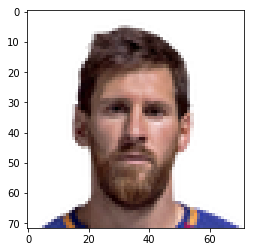

Nome:  L. Messi
ID:  158023
Nacionalidade:  Argentina
Clube:  FC Barcelona


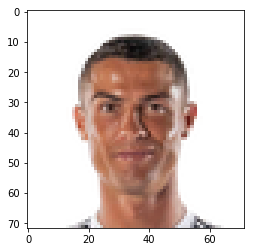

Nome:  Cristiano Ronaldo
ID:  20801
Nacionalidade:  Portugal
Clube:  Juventus


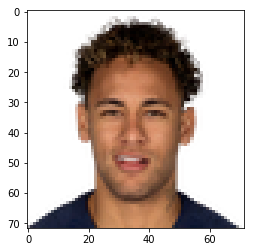

Nome:  Neymar Jr
ID:  190871
Nacionalidade:  Brazil
Clube:  Paris Saint-Germain


In [8]:
show_players_example(players_global, 3)

# INSERTION SORT

In [9]:
def insertion_sort(players):
    """Implement insertion sort algorithm
    
    Attributes:
        players: list with all soccer players.
    """
    players_length = len(players)
    
    for i in range(1, players_length):
        j = i-1
        while j >= 0 and players[j].club > players[j+1].club:
            players[j], players[j+1] = players[j+1], players[j]
            
            j = j-1
            
    return players

# SELECTION SORT

In [10]:
def selection_sort(players):
    """Implement selection sort algorithm
    
    Attributes:
        players: list with all soccer players.
    """
    players_length = len(players)
    
    for i in range(players_length):
        min_idx = i
        for j in range(i+1, players_length): 
            if players[min_idx].club > players[j].club: 
                min_idx = j 
          
        players[i], players[min_idx] = players[min_idx], players[i]
    
    return players

# BUBBLE SORT

In [11]:
def bubble_sort(players):
    """Implement bubble sort algorithm
    
    Attributes:
        players: list with all soccer players.
    """
    players_length = len(players)
    
    for i in range(players_length):
        swap = False
        for j in range(0, players_length-i-1):
            if players[j].club > players[j+1].club:
                players[j], players[j+1] = players[j+1], players[j]
                swap = True
        
        if not swap:
            break
                
    return players

# SHELL SORT

In [12]:
def shell_sort(players):
    """Implement shell sort algorithm
    
    Attributes:
        players: list with all soccer players.
    """
    players_length = len(players) 
    gap = players_length//2
    
    while gap:
        for i in range(gap, players_length):
            tmp = players[i]
            
            j = i 
            while  j >= gap and players[j-gap].club > tmp.club: 
                players[j] = players[j-gap] 
                j -= gap
  
            players[j] = tmp
        gap //= 2
    
    return players

# ALGORITHM COMPLEXITY

In [13]:
def execution_time(players, function):
    """Time taken to sort players with certain function
    
    Attributes:
        players: list with all soccer players;
        function: insertion_sort, selection_sort, bubble_sort or shell_sort.
    """
    begin = time.time()
    function(players.copy())
    end = time.time()

    time_spend = end - begin
    
    return time_spend

In [14]:
def algorithms_complexity(players):
    """Evaluate taken time to four sort algorithms methods
    
    Attributes:
        players: list with all soccer players;
    """
    print(">>> LOADING <<<: GENERATING GRAPHIC!")
    
    functions = [insertion_sort, selection_sort, bubble_sort, shell_sort]
    
    bar = IntProgress(min=0, max = 4, description='PROGRESS:') # instantiate the bar
    display(bar)
    
    times = []
    for function in functions:
        time_spend = execution_time(players.copy(), function)
        times.append(time_spend)
        
        bar.value += 1
    
    return times

In [15]:
def show_algorithms_complexity(times):
    """Plot algorithm complexity of four sort algorithms
    
    Attributes:
        times: list with time taken to evaluate insertion, selection, bubble and shell algorithms.
    """
    plt.grid(which='major', axis='y', color='green', linewidth=0.3)
    plt.bar([1, 2, 3, 4], height=times) 
    plt.xticks([1, 2, 3, 4], ['insertion','selection','bubble', 'shell'])
    plt.xlabel('sort method')
    plt.ylabel('seconds')
    
    plt.plot()

# COMPUTE ALGORITHMS TIME COMPLEXITY

### PLAYERS UNORDERED

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

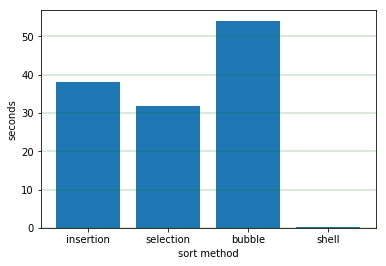

In [16]:
times_unordered = list(algorithms_complexity(players_global.copy()))
show_algorithms_complexity(times_unordered)

### PLAYERS ORDERED

In [17]:
# ORDER PLAYERS VARIABLE FROM GLOBAL SCOPE
players_global = shell_sort(players_global.copy())

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

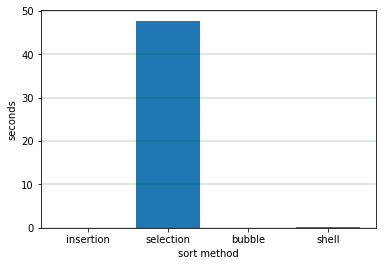

In [18]:
times_ordered = list(algorithms_complexity(players_global.copy()))
show_algorithms_complexity(times_ordered)

# PLAYERS FROM A CERTAIN CLUB

In [19]:
def show_random_club(players):
    """Generate random player and show its club logo and all colleagues's club
    
    Attributes:
        players: list with all soccer players ordered;
    """
    players_length = len(players)
    up_limit = 0
    idx = 0
    while True:
        idx = int(random.uniform(0, players_length-1))
        if players[idx].club_logo != 'nan':
            break

    plot_photo(players[idx].club_logo)
    
    for i in range(idx,players_length):
        if players[i].club != players[idx].club:
            up_limit = i-1
            break

    for i in range(up_limit,0,-1):
        if players[i].club != players[idx].club:
            break
        show_player_informations(players[i])

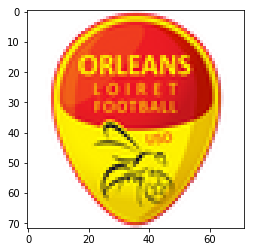

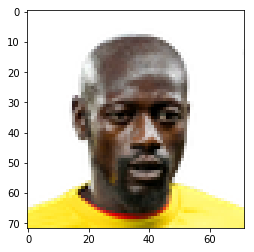

Nome:  O. Cissokho
ID:  190015
Nacionalidade:  Senegal
Clube:  US Orléans Loiret Football


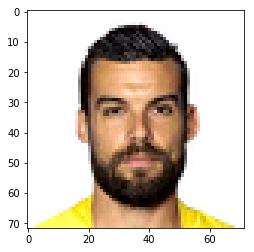

Nome:  G. Pinaud
ID:  188823
Nacionalidade:  France
Clube:  US Orléans Loiret Football


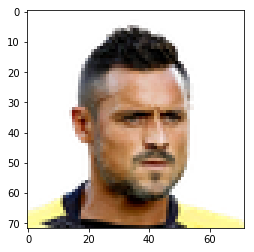

Nome:  K. Ziani
ID:  49659
Nacionalidade:  Algeria
Clube:  US Orléans Loiret Football


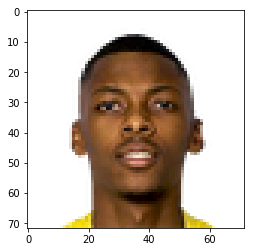

Nome:  S. Furtado
ID:  239453
Nacionalidade:  France
Clube:  US Orléans Loiret Football


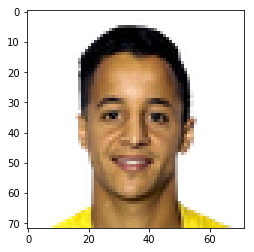

Nome:  H. Benkaïd
ID:  237231
Nacionalidade:  France
Clube:  US Orléans Loiret Football


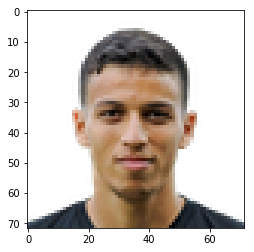

Nome:  A. Talal
ID:  239460
Nacionalidade:  Morocco
Clube:  US Orléans Loiret Football


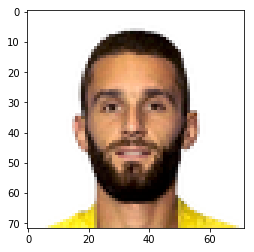

Nome:  C. Cambon
ID:  165243
Nacionalidade:  France
Clube:  US Orléans Loiret Football


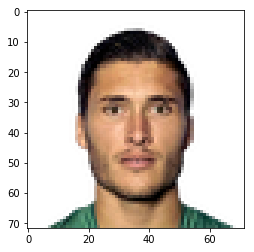

Nome:  G. Gallon
ID:  214680
Nacionalidade:  France
Clube:  US Orléans Loiret Football


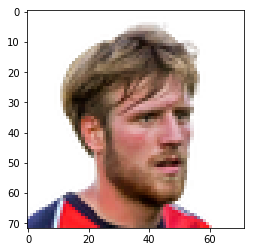

Nome:  R. Droehnle
ID:  243132
Nacionalidade:  France
Clube:  US Orléans Loiret Football


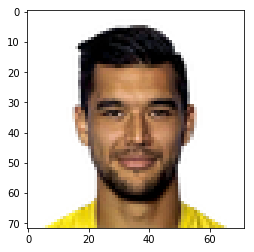

Nome:  A. Monfray
ID:  215708
Nacionalidade:  France
Clube:  US Orléans Loiret Football


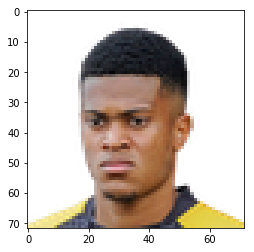

Nome:  J. Tell
ID:  240434
Nacionalidade:  France
Clube:  US Orléans Loiret Football


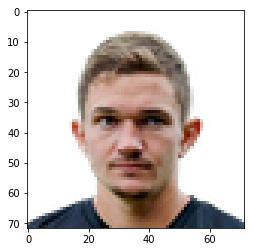

Nome:  G. Perrin
ID:  232360
Nacionalidade:  France
Clube:  US Orléans Loiret Football


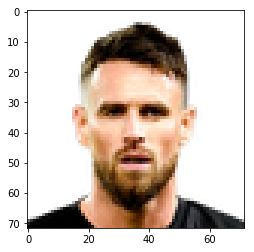

Nome:  A. Le Tallec
ID:  51887
Nacionalidade:  France
Clube:  US Orléans Loiret Football


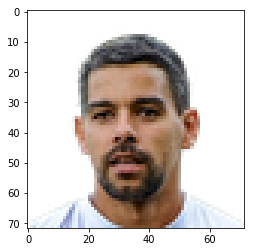

Nome:  T. Renault
ID:  223438
Nacionalidade:  France
Clube:  US Orléans Loiret Football

Foto indisponível nos servidores FIFA!

Nome:  A. Laurienté
ID:  243593
Nacionalidade:  France
Clube:  US Orléans Loiret Football


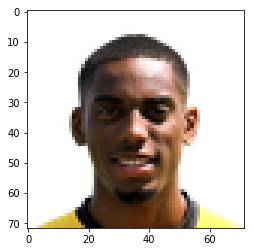

Nome:  T. Ephestion
ID:  237551
Nacionalidade:  France
Clube:  US Orléans Loiret Football


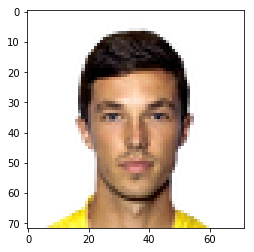

Nome:  M. D'Arpino
ID:  234914
Nacionalidade:  France
Clube:  US Orléans Loiret Football


In [ ]:
show_random_club(players_global)

# Considerações finais

Como foi proposto, foram utilizados quatro algoritimos quadráticos de ordenação. A ordenação foi feita de acordo com o nome do clube para facilitar na busca, logo que o objetivo era mostrar um clube aleatório e seus respectivos jogadores. Desta forma a busca pode ser implementada com complexidade constante.

Foram utlilizados dois tipos de entrada para testar os algorímos. No primeiro teste foi utilizado um dataset desordenado para verificar o tempo de resposta dos algoritimos. Pode-se notar para essa entrada que a resposta do shell sort foi bem mais rápida em comparação com os outros três metodos. Isso ocorreu devido ao comportamento do shell sort, que apesar de seu pior caso ser quadrático, para certas entradas ele tem complexidade $O(n log n)$. O insertion sort e o selection sort obtiveram resultados bem parecidos enquanto o bubble sort foi inferior.

Já no segundo teste o conjunto de dados já estava ordenado. Como experado, o insertion e bubble, obtiveram um resultado muito expressivo, logo que, para este tipo de entranda esses algoritimos se comportam de forma linear, enquanto os outros dois demonstraram comportamento semelhante ao teste anterior.